## Physically Informed Neural Network
Here is show how to implement some of the ideas that are presented in [3].

### Example - 1D Poisson (DNN3 $\sigma = \tanh$)

In [90]:
import tensorflow as tf
from tensorflow.keras.constraints import min_max_norm
import logging
tf.get_logger().setLevel(logging.ERROR)
import numpy as np
import matplotlib.pyplot as plt
from numsa.TFHessian import *
from random import *
from tqdm.notebook import tqdm


tf.random.set_seed(7)
############| SETTINGS |############
a = -1; b = 1;
N = 50; #Nuerons in the Hidden Layer
N_EvEl = 101; #Spacing of the evaluation function
itmax = 10000;
step = 1e-3;
tol=1e-32
gamma = tf.Variable(1e0,dtype=np.float32)
def f(x):
    return (np.pi**2)*np.sin(np.pi*x);
####################################

#Pnts = np.linspace(a,b,N_EvEl)


Pnts = np.array([0.0])
Pnts = np.append(Pnts,np.random.uniform(a,b,N_EvEl))
Pnts = np.append(Pnts,1.0)
#Pnts = np.random.uniform(a,b,N_EvEl)

Pnts = np.sort(Pnts)

u = tf.keras.Sequential([
    tf.keras.layers.Dense(N,input_dim=1, activation='tanh'),#Hidden Layer
    tf.keras.layers.Dense(N,activation="tanh"),
    tf.keras.layers.Dense(N,activation="tanh"),
    tf.keras.layers.Dense(1,use_bias=False)#10 leyers weights.
])

#We create an evaluation mesh
mesh = tf.Variable([[point] for point in Pnts]);
F = tf.cast(tf.Variable([[-f(point)] for point in Pnts]),dtype=np.float32);
#Defining the lost function
def ColEnergy(weights):
    with tf.GradientTape() as gtape2:
        with tf.GradientTape() as gtape:
            uh = u(mesh, training=True)
        du_dx = gtape.gradient(uh, [mesh])
    #We use TF Gradient Tape to compute grad uh
    d2u_dx2 = gtape2.gradient(du_dx,[mesh])
    Delta = (d2u_dx2-F)
    Energy = (1/N_EvEl)*tf.reduce_sum(tf.square(Delta));
    #Adding B.C using penalty method idea;
    Energy = Energy + (gamma/N_EvEl)*(tf.square(u(tf.Variable([[a]])))+tf.square(u(tf.Variable([[b]]))))
    return Energy;

In [91]:
print(u(mesh).shape)
print(ColEnergy(u.trainable_weights))

(103, 1)
tf.Tensor([[40.050835]], shape=(1, 1), dtype=float32)


In [92]:
optimizer = tf.keras.optimizers.Adamax(learning_rate=step)

# Iterate over the batches of a dataset.
for it in tqdm(range(itmax)):
    # Open a GradientTape.
    with tf.GradientTape() as tape:
        Loss = ColEnergy(u.trainable_weights)
    # Get gradients of loss wrt the weights.
    gradients = tape.gradient(Loss, u.trainable_weights)
    res = sum([tf.norm(grad) for grad in gradients]);
    # Update the weights of the model.
    optimizer.apply_gradients(zip(gradients, u.trainable_weights))
    if res <= tol:
        break;
    if it%(itmax/10) == 0:
        print("[It. {}] Loss function value {} and residual {}.".format(it,Loss,res))
    
print("Loss function value {} and residual {}.".format(Loss,res))   

  0%|          | 0/10000 [00:00<?, ?it/s]

[It. 0] Loss function value [[40.050835]] and residual 29.165576934814453.
[It. 1000] Loss function value [[0.00762097]] and residual 0.15168429911136627.
[It. 2000] Loss function value [[1.4110279e-05]] and residual 0.11412914842367172.
[It. 3000] Loss function value [[5.9321637e-06]] and residual 0.16223815083503723.
[It. 4000] Loss function value [[3.0792385e-06]] and residual 0.0004416355805005878.
[It. 5000] Loss function value [[2.884495e-06]] and residual 0.0009915133705362678.
[It. 6000] Loss function value [[2.7776434e-06]] and residual 0.008474547415971756.
[It. 7000] Loss function value [[3.0952278e-06]] and residual 0.05875520408153534.
[It. 8000] Loss function value [[1.87274e-05]] and residual 0.35876917839050293.
[It. 9000] Loss function value [[2.5348052e-06]] and residual 0.003511270973831415.
Loss function value [[0.00036402]] and residual 2.1709649562835693.
Loss function value [[0.00036402]] and residual 2.1709649562835693.


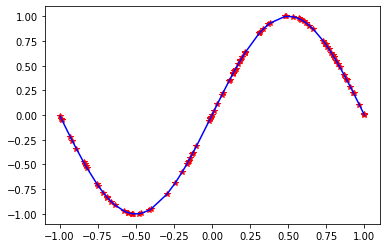

In [93]:
plt.plot(mesh.numpy(),u(mesh).numpy(),"r*")
plt.plot(mesh.numpy(),np.sin(np.pi*mesh.numpy()),"b-")

### Example - 1D Poisson (DNN1 $\sigma = \tanh$)

In [292]:
import tensorflow as tf
from tensorflow.keras.constraints import min_max_norm
import logging
tf.get_logger().setLevel(logging.ERROR)
import numpy as np
import matplotlib.pyplot as plt
from numsa.TFHessian import *
from random import *
from tqdm.notebook import tqdm


tf.random.set_seed(7)
############| SETTINGS |############
a = -1; b = 1;
N = 50; #Nuerons in the Hidden Layer
N_EvEl = 101; #Spacing of the evaluation function
itmax = 10000;
step = 1e-3;
tol=1e-32
gamma = tf.Variable(1e0,dtype=np.float32)
def f(x):
    return (np.pi**2)*np.sin(np.pi*x);
####################################

#Pnts = np.linspace(a,b,N_EvEl)


Pnts = np.array([0.0])
Pnts = np.append(Pnts,np.random.uniform(a,b,N_EvEl))
Pnts = np.append(Pnts,1.0)
#Pnts = np.random.uniform(a,b,N_EvEl)

Pnts = np.sort(Pnts)

u = tf.keras.Sequential([
    tf.keras.layers.Dense(N,input_dim=1, activation='tanh'),#Hidden Layer
    tf.keras.layers.Dense(N,activation="tanh"),
    tf.keras.layers.Dense(N,activation="tanh"),
    tf.keras.layers.Dense(1,use_bias=False)
])
#We create an evaluation mesh
mesh = tf.Variable([[point] for point in Pnts]);
F = tf.cast(tf.Variable([[-f(point)] for point in Pnts]),dtype=np.float32);
#Defining the lost function
def ColEnergy(weights):
    with tf.GradientTape() as gtape2:
        with tf.GradientTape() as gtape:
            uh = u(mesh, training=True)
        du_dx = gtape.gradient(uh, [mesh])
    #We use TF Gradient Tape to compute grad uh
    d2u_dx2 = gtape2.gradient(du_dx,[mesh])
    Delta = (d2u_dx2-F)
    Energy = (1/N_EvEl)*tf.reduce_sum(tf.square(Delta));
    #Adding B.C using penalty method idea;
    Energy = Energy + (gamma/N_EvEl)*(tf.square(u(tf.Variable([[a]])))+tf.square(u(tf.Variable([[b]]))))
    return Energy;
optimizer = tf.keras.optimizers.Adamax(learning_rate=step)

def Residual(u,F,mesh):
    with tf.GradientTape() as gtape2:
        with tf.GradientTape() as gtape:
            uh = u(mesh, training=True)
        du_dx = gtape.gradient(uh, [mesh])
    #We use TF Gradient Tape to compute grad uh
    d2u_dx2 = gtape2.gradient(du_dx,[mesh])
    Delta = (d2u_dx2-F)
    return tf.abs(Delta)

# Iterate over the batches of a dataset.
for it in tqdm(range(itmax)):
    # Open a GradientTape.
    with tf.GradientTape() as tape:
        Loss = ColEnergy(u.trainable_weights)
    # Get gradients of loss wrt the weights.
    gradients = tape.gradient(Loss, u.trainable_weights)
    res = sum([tf.norm(grad) for grad in gradients]);
    # Update the weights of the model.
    optimizer.apply_gradients(zip(gradients, u.trainable_weights))
    if res <= tol:
        break;
    if it%(itmax/10) == 0:
        print("[It. {}] Loss function value {} and residual {}.".format(it,Loss,res))
    
print("Loss function value {} and residual {}.".format(Loss,res)) 

  0%|          | 0/10000 [00:00<?, ?it/s]

[It. 0] Loss function value [[47.58513]] and residual 29.967132568359375.
[It. 1000] Loss function value [[0.02422978]] and residual 0.27939367294311523.
[It. 2000] Loss function value [[3.2929485e-05]] and residual 0.009194925427436829.
[It. 3000] Loss function value [[1.91464e-05]] and residual 0.2636896073818207.
[It. 4000] Loss function value [[8.559388e-06]] and residual 0.0057030790485441685.
[It. 5000] Loss function value [[8.303453e-06]] and residual 0.17399658262729645.
[It. 6000] Loss function value [[1.4363231e-05]] and residual 0.3202716112136841.
[It. 7000] Loss function value [[0.00021103]] and residual 1.486494541168213.
[It. 8000] Loss function value [[2.9980235e-06]] and residual 0.009862914681434631.
[It. 9000] Loss function value [[2.6586863e-06]] and residual 0.0025417322758585215.
Loss function value [[1.9671268e-05]] and residual 0.3886968493461609.


In [293]:
print(np.sort(u.trainable_weights[1]))

[-0.27001816 -0.21747252 -0.19011763 -0.169333   -0.13530742 -0.1055332
 -0.10090449 -0.08570833 -0.07444169 -0.05811505 -0.05412426 -0.03438613
 -0.02805923 -0.02659301 -0.02659121 -0.02556042 -0.01982124 -0.01281052
 -0.00818613 -0.00629208 -0.00330072  0.00132269  0.0029452   0.00486719
  0.00637774  0.00696512  0.01364561  0.01929844  0.01979859  0.01987119
  0.02026158  0.02216954  0.0278197   0.03075207  0.03076147  0.03101117
  0.0365699   0.04063027  0.04845106  0.05061631  0.05687356  0.06605866
  0.06703468  0.07557973  0.0776885   0.09087856  0.10293292  0.16800447
  0.20304117  0.22099084]


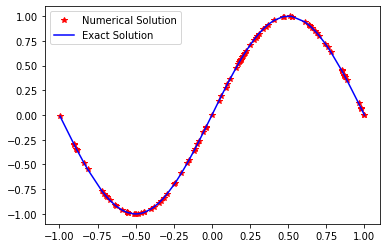

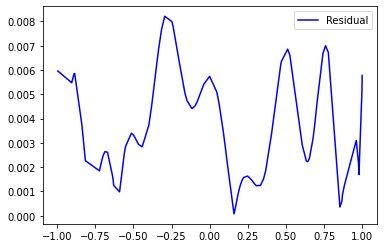

In [294]:
plt.figure()
plt.plot(mesh.numpy(),u(mesh).numpy(),"r*")
plt.plot(mesh.numpy(),np.sin(np.pi*mesh.numpy()),"b-")
plt.legend(["Numerical Solution","Exact Solution"])
plt.figure()
plt.plot(mesh.numpy(),Residual(u,F,mesh)[0].numpy(),"b-")
plt.legend(["Residual"])

### Example - 2D Poisson (DNN1 $\sigma = \tanh$)

  0%|          | 0/50000 [00:00<?, ?it/s]

[It. 0] Loss function value 94.02625274658203 and residual 66.9883041381836.
[It. 5000] Loss function value 0.0005738496547564864 and residual 0.3201807141304016.
[It. 10000] Loss function value 0.0001225653977598995 and residual 0.4475027024745941.
[It. 15000] Loss function value 0.0002519816916901618 and residual 2.434551477432251.
[It. 20000] Loss function value 4.586800787365064e-05 and residual 0.006709661800414324.
[It. 25000] Loss function value 3.424875467317179e-05 and residual 0.036754678934812546.
[It. 30000] Loss function value 0.0001948749995790422 and residual 2.1487298011779785.
[It. 35000] Loss function value 2.1951651433482766e-05 and residual 0.04553081840276718.
[It. 40000] Loss function value 3.4470820537535474e-05 and residual 0.8276177048683167.
[It. 45000] Loss function value 3.0427530873566866e-05 and residual 0.820854663848877.


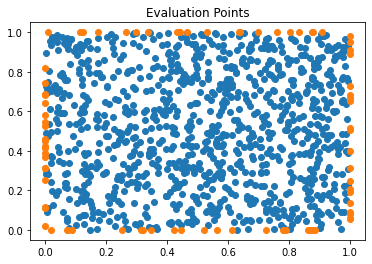

In [302]:
import tensorflow as tf
from tensorflow.keras.constraints import min_max_norm
import logging
tf.get_logger().setLevel(logging.ERROR)
import numpy as np
import matplotlib.pyplot as plt
from numsa.TFHessian import *
from random import *
from tqdm.notebook import tqdm
import itertools


tf.random.set_seed(7)
############| SETTINGS |############
a = 0; b = 0;
c = 1; d= 1;
N = 50; #Nuerons in the Hidden Layer
N_EvEl = 1001; #Spacing of the evaluation function
N_EvEl_BC = 20; #Spacing of the evaluation function
itmax = 50000;
step = 1e-3;
tol=1e-32
data_type="float32"
gamma = tf.Variable(1e0,dtype=np.float32)
def f(x,y):
    return (2*np.pi**2)*np.sin(np.pi*x)*np.sin(np.pi*y);
####################################

#Pnts = np.linspace(a,b,N_EvEl)


xy_min = [a, b]
xy_max = [c, d]
Pnts = np.random.uniform(low=xy_min, high=xy_max, size=(N_EvEl,2))
BNDPnts = [[P,b] for P in np.random.uniform(a,c,N_EvEl_BC)]
BNDPnts = BNDPnts + [[c,P] for P in np.random.uniform(b,d,N_EvEl_BC)]
BNDPnts = BNDPnts + [[P,d] for P in np.random.uniform(a,c,N_EvEl_BC)]
BNDPnts = BNDPnts + [[a,P] for P in np.random.uniform(b,d,N_EvEl_BC)]
plt.figure();
plt.scatter([P[0] for P in Pnts],[P[1] for P in Pnts]);
plt.scatter([P[0] for P in BNDPnts],[P[1] for P in BNDPnts])
plt.title("Evaluation Points")

u = tf.keras.Sequential([
    tf.keras.layers.Dense(N,input_dim=2, activation='tanh'),#Hidden Layer
    tf.keras.layers.Dense(N,activation="tanh"),
    tf.keras.layers.Dense(N,activation="tanh"),
    tf.keras.layers.Dense(1,use_bias=False)
])
#We create an evaluation mesh
mesh = np.array([[point[0],point[1]] for point in Pnts],data_type);
mesh = tf.Variable(mesh)
BNDMesh = np.array([[point[0],point[1]] for point in BNDPnts],data_type);
BNDMesh = tf.Variable(BNDMesh)
F = tf.cast(tf.Variable([[-f(point[0],point[1])] for point in Pnts]),dtype=np.float32);
#Defining the lost function
def ColEnergy(weights):
    v = tf.Variable([[1.0,0.0] for i in range(N_EvEl)])
    with tf.autodiff.ForwardAccumulator(mesh,v) as acc:
        with tf.GradientTape() as tape:
            uh = u(mesh, training=True)
        gradu = tape.gradient(uh,mesh);
    d2u_dx2=acc.jvp(gradu)[:,0]
    v = tf.Variable([[0.0,1.0] for i in range(N_EvEl)])
    with tf.autodiff.ForwardAccumulator(mesh,v) as acc:
        with tf.GradientTape() as tape:
            uh = u(mesh, training=True)
        gradu = tape.gradient(uh,mesh);
    d2u_dy2=acc.jvp(gradu)[:,1]
    Delta = (d2u_dx2+d2u_dy2-tf.reshape(F,(N_EvEl,)))
    Energy = (1/(N_EvEl))*tf.reduce_sum(tf.square(Delta));
    #Adding B.C using penalty method idea;
    Energy = Energy + (gamma/N_EvEl_BC)*tf.reduce_sum((tf.square(u(BNDMesh))))
    return Energy;


LossHistory = [];


optimizer = tf.keras.optimizers.Adamax(learning_rate=step)

# Iterate over the batches of a dataset.
for it in tqdm(range(itmax)):
    # Open a GradientTape.
    with tf.GradientTape() as tape:
        Loss = ColEnergy(u.trainable_weights)
    # Get gradients of loss wrt the weights.
    gradients = tape.gradient(Loss, u.trainable_weights)
    res = sum([tf.norm(grad) for grad in gradients]);
    # Update the weights of the model.
    optimizer.apply_gradients(zip(gradients, u.trainable_weights))
    if res <= tol:
        break;
    if it%(itmax/10) == 0:
        print("[It. {}] Loss function value {} and residual {}.".format(it,Loss,res))
    LossHistory = LossHistory + [Loss];


Text(0.5, 1.0, 'Residual At Evaluation Point')

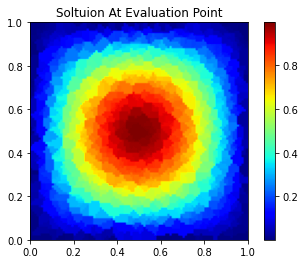

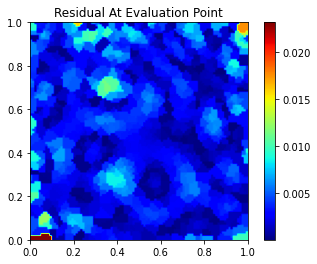

In [309]:
from scipy.interpolate import griddata
grid_x, grid_y = np.mgrid[0:1:100j, 0:1:100j]
def Residual(u,F,mesh):
    v = tf.Variable([[1.0,0.0] for i in range(N_EvEl)])
    with tf.autodiff.ForwardAccumulator(mesh,v) as acc:
        with tf.GradientTape() as tape:
            uh = u(mesh, training=True)
        gradu = tape.gradient(uh,mesh);
    d2u_dx2=acc.jvp(gradu)[:,0]
    v = tf.Variable([[0.0,1.0] for i in range(N_EvEl)])
    with tf.autodiff.ForwardAccumulator(mesh,v) as acc:
        with tf.GradientTape() as tape:
            uh = u(mesh, training=True)
        gradu = tape.gradient(uh,mesh);
    d2u_dy2=acc.jvp(gradu)[:,1]
    Delta = (d2u_dx2+d2u_dy2-tf.reshape(F,(N_EvEl,)))
    return tf.abs(Delta)


grid_u = griddata(mesh.numpy(), u(mesh).numpy().reshape(N_EvEl,),(grid_x, grid_y), method='nearest')
plt.figure()
plt.imshow(grid_u.T, extent=(0,1,0,1), origin='lower',cmap="jet")
plt.colorbar()
plt.title("Soltuion At Evaluation Point")

grid_res = griddata(mesh.numpy(), Residual(u,F,mesh).numpy().reshape(N_EvEl,),(grid_x, grid_y), method='nearest')
plt.figure()
plt.imshow(grid_res.T, extent=(0,1,0,1), origin='lower',cmap="jet")
plt.colorbar()
plt.title("Residual At Evaluation Point")

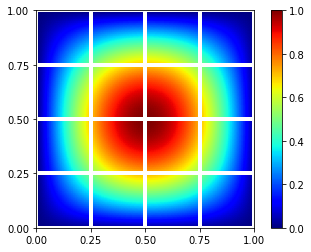

In [331]:
x = np.arange(0.0, 1.0, 0.01)
y = np.arange(0.0, 1.0, 0.01)
X, Y = np.meshgrid(x, y)
Z = 1*X;
for i in range(len(X)):
    for j in range(len(Y)):
        Z[i,j] = u(np.array([[X[i,j],Y[i,j]]]));
import matplotlib.ticker as plticker
fig,ax = plt.subplots()
loc = plticker.MultipleLocator(base=0.25)
ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(loc)
plt.imshow(Z, cmap='jet',extent=(0,1,0,1))
plt.colorbar()
plt.grid(color='white', linestyle='-', linewidth=4)

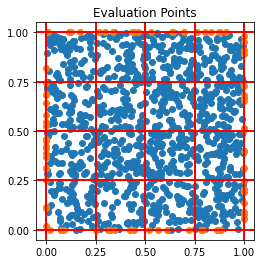

In [333]:
import matplotlib.ticker as plticker
fig,ax = plt.subplots()
ax.scatter([P[0] for P in Pnts],[P[1] for P in Pnts]);
ax.scatter([P[0] for P in BNDPnts],[P[1] for P in BNDPnts])
ax.set_title("Evaluation Points")
ax.set_aspect('equal', 'box')
loc = plticker.MultipleLocator(base=0.25)
ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(loc)
plt.grid(color='red', which='major',linestyle='-', linewidth=2)

In [305]:
print("Number of NN parameters: ",util_shape_product([l.shape  for l in u.trainable_weights]))
print([l.shape for l in u.trainable_weights])

Number of NN parameters:  5300
[TensorShape([2, 50]), TensorShape([50]), TensorShape([50, 50]), TensorShape([50]), TensorShape([50, 50]), TensorShape([50]), TensorShape([50, 1])]


## Deep Ritz Method
Here is show how to implement some of the ideas that are presented in [4].

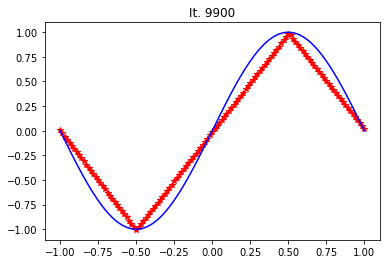

Loss function value [[-4.080785]] and residual 10.798479080200195.


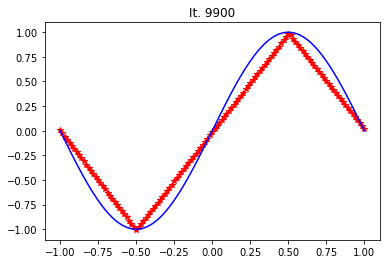

In [194]:
import tensorflow as tf
from tensorflow.keras.constraints import min_max_norm,max_norm
import logging
tf.get_logger().setLevel(logging.ERROR)
import numpy as np
import matplotlib.pyplot as plt
from numsa.TFHessian import *
from random import *
from tqdm.notebook import tqdm
from IPython import display

tf.random.set_seed(7)
############| SETTINGS |############
a = -1; b = 1;
N = 20; #Nuerons in the Hidden Layer
N_EvEl = 129 #Spacing of the evaluation function
optit = 10000;
step = 5e-2;
decayrate=0#1e-8;
tol=1e-4
lam = 1e-1
gamma = tf.Variable(1e4,dtype=np.float32)
def f(x):
    return (np.pi**2)*np.sin(np.pi*x);
####################################

Pnts = np.linspace(a,b,N_EvEl)
Pnts = np.sort(Pnts)

u = tf.keras.Sequential([
    tf.keras.layers.Dense(N,input_dim=1, activation='relu'),
    tf.keras.layers.Dense(1,use_bias=False)
])

#We create an evaluation mesh
mesh = tf.Variable([[point] for point in Pnts])
F = tf.cast(tf.Variable([[f(point)] for point in Pnts]),dtype=np.float32);
#Defining the lost function
def integral(y, x):
    y = tf.cast(y,dtype=np.float32);
    x = tf.cast(x,dtype=np.float32);
    Nsamps = int(x.shape[0])
    Ninterv = Nsamps-1
    n = 1
    k = 0
    while n < Ninterv:
        n <<= 1
        k += 1
    if n != Ninterv:
        raise ValueError("Number of samples must be one plus a non-negative power of 2.")
    R = {}
    h = x[-1] - x[0]
    R[(0, 0)] = (y[0] + y[-1])/2*h
    start = stop = step = Ninterv
    for i in range(1, k+1):
        start >>= 1
        R[(i, 0)] = 0.5*(R[(i-1, 0)] + h*tf.reduce_sum(y[start:stop:step]))
        step >>= 1
        for j in range(1, i+1):
            prev = R[(i, j-1)]
            R[(i, j)] = prev + (prev-R[(i-1, j-1)]) / ((1 << (2*j))-1)
        h /= 2.0
    return R[(k, k)]
def DirichletEnergy(weights):
    with tf.GradientTape() as gtape2:
        with tf.GradientTape() as gtape:
            uh = u(mesh, training=True)
        du_dx = tf.cast(gtape.gradient(uh, [mesh]), dtype=np.float32)
    #We use TF Gradient Tape to compute grad uh
    d2u_dx2 = tf.cast(gtape2.gradient(du_dx,[mesh]),dtype=np.float32)
    Delta = 0.5*du_dx[0]*du_dx[0]-F*uh
    Energy = integral(Delta,mesh);
    #Adding B.C using penalty method idea;
    Energy = Energy + (gamma/(N_EvEl-1))*(u(tf.Variable([[a]]))*u(tf.Variable([[a]]))+u(tf.Variable([[b]]))*u(tf.Variable([[b]])))
    return Energy;
optimizer = tf.keras.optimizers.Adam(learning_rate=step,decay=decayrate)
for i in range(optit):
    # Open a GradientTape.
    with tf.GradientTape() as tape:
        Loss = DirichletEnergy(u.trainable_weights)
    # Get gradients of loss wrt the weights.
    gradients = tape.gradient(Loss, u.trainable_weights)
    res = sum([tf.norm(grad) for grad in gradients]);
    # Update the weights of the model.
    optimizer.apply_gradients(zip(gradients, u.trainable_weights))
    if res <= tol:
        break;
    if (i%100)==0:
        print("[It. {}] Loss function value {} and residual {}.".format(i,Loss,res))
        
        plt.clf()
        plt.title("It. {}".format(i))
        plt.plot(mesh.numpy(),u(mesh).numpy(),"r*")
        plt.plot(mesh.numpy(),np.sin(np.pi*mesh.numpy()),"b-")
        display.clear_output()
        display.display(plt.gcf())
        

print("Loss function value {} and residual {}.".format(Loss,res))

An other option is to split the minimization process in two different part, one is the mesh optimization the other is the energy minimization.

In [178]:
import tensorflow as tf
from tensorflow.keras.constraints import min_max_norm,max_norm
import logging
tf.get_logger().setLevel(logging.ERROR)
import numpy as np
import matplotlib.pyplot as plt
from numsa.TFHessian import *
from random import *
from tqdm.notebook import tqdm
from IPython import display

tf.random.set_seed(7)
############| SETTINGS |############
a = -1; b = 1;
N = 20; #Nuerons in the Hidden Layer
N_EvEl = 101 #Spacing of the evaluation function
itmax = 15;
optit = 1000;
meshit = 1;
step = 5e-2;
decayrate=0;
tol=1e-4
lam = 1e-1
gamma = tf.Variable(1e4,dtype=np.float32)
def f(x):
    return (np.pi**2)*np.sin(np.pi*x);
####################################

Pnts = np.linspace(a,b,N_EvEl)
Pnts = np.sort(Pnts)

u = tf.keras.Sequential([
    tf.keras.layers.Dense(N,input_dim=1, activation='relu'),
    tf.keras.layers.Dense(1,use_bias=False)
])

#We create an evaluation mesh
mesh = tf.Variable([[point] for point in Pnts]);
F = tf.cast(tf.Variable([[f(point)] for point in Pnts]),dtype=np.float32);
#Defining the lost function
def DirichletEnergy(weights):
    with tf.GradientTape() as gtape2:
        with tf.GradientTape() as gtape:
            uh = u(mesh, training=True)
        du_dx = tf.cast(gtape.gradient(uh, [mesh]), dtype=np.float32)
    #We use TF Gradient Tape to compute grad uh
    d2u_dx2 = tf.cast(gtape2.gradient(du_dx,[mesh]),dtype=np.float32)
    Delta = 0.5*du_dx[0]*du_dx[0]-F*uh;
    Energy = tf.cast((1/(N_EvEl-1))*tf.reduce_sum(Delta),dtype=np.float32);
    #Adding B.C using penalty method idea;
    Energy = Energy + (gamma/(N_EvEl-1))*(u(tf.Variable([[a]]))*u(tf.Variable([[a]]))+u(tf.Variable([[b]]))*u(tf.Variable([[b]])))
    return Energy;

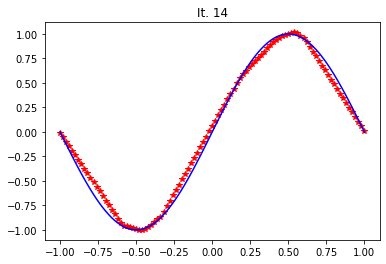

Loss function value [[-2.3267813]] and residual 0.014013195410370827.


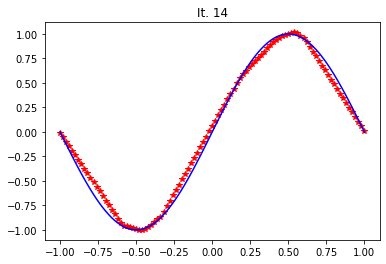

In [179]:
meshoptimizer = tf.keras.optimizers.Adam(learning_rate=step)
optimizer = tf.keras.optimizers.Adam(learning_rate=step,decay=decayrate)
for k in tqdm(range(itmax)):
    
    u.layers[0].trainable = True;
    u.layers[1].trainable = False;
    
    for j in range(meshit):
        with tf.GradientTape() as tape:
            Loss = DirichletEnergy(u.trainable_weights)
        # Get gradients of loss wrt the weights.
        gradients = tape.gradient(Loss, u.trainable_weights)
        # Update the weights of the model.
        meshoptimizer.apply_gradients(zip(gradients, u.trainable_weights))

    u.layers[0].trainable = False;
    u.layers[1].trainable = True;
    
    for i in range(optit):
        # Open a GradientTape.
        with tf.GradientTape() as tape:
            Loss = DirichletEnergy(u.trainable_weights)
        # Get gradients of loss wrt the weights.
        gradients = tape.gradient(Loss, u.trainable_weights)
        res = sum([tf.norm(grad) for grad in gradients]);
        # Update the weights of the model.
        optimizer.apply_gradients(zip(gradients, u.trainable_weights))
        if res <= tol:
            break;
    if (k%1)==0:
        print("[It. {}] Loss function value {} and residual {}.".format(k,Loss,res))
        plt.clf()
        plt.title("It. {}".format(k))
        plt.plot(mesh.numpy(),u(mesh).numpy(),"r*")
        plt.plot(mesh.numpy(),np.sin(np.pi*mesh.numpy()),"b-")
        display.clear_output()
        display.display(plt.gcf())

print("Loss function value {} and residual {}.".format(Loss,res))

In [142]:
u.layers[0].trainable = True
u.layers[1].trainable = True
print(np.sort(u.trainable_weights[1]))

[-0.8615582  -0.5952093  -0.5610653  -0.54104936 -0.5303225  -0.5241078
 -0.48691142 -0.47965163 -0.4577423  -0.44647846 -0.4116421   0.51156074
  0.51954836  0.5911954   0.7508275   0.7552834   0.9539397   1.069409
  1.2431484   1.2926307 ]
